# Exploratory Data Analysis

## Variables Description

- **flight_id**: A unique identifier assigned to each flight.
- **date**: The date when the flight took place.
- **callsign**: The encrypted callsign associated with the flight.
- **adep**: The code of the departure airport.
- **name_adep**: The name of the departure airport.
- **country_code_adep**: The country code of the departure airport.
- **ades**: The code of the destination airport.
- **name_ades**: The name of the destination airport.
- **country_code_ades**: The country code of the destination airport.
- **actual_offblock_time**: The time when the aircraft started to move from its parking position.
- **arrival_time**: The time of arrival at the destination airport.
- **aircraft_type**: The type of aircraft used for the flight.
- **wtc**: The wake turbulence category of the aircraft.
- **airline**: The encrypted identifier of the airline operating the flight.
- **flight_duration**: The duration of the flight in minutes.
- **taxiout_time**: The time spent taxiing out from the departure airport.
- **flown_distance**: The distance flown during the flight in kilometers.
- **tow**: The target variable representing the actual TakeOff Weight (TOW) of the aircraft.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# Load the datasets
challenge_set_original = pd.read_csv('./data/challenge_set.csv')
submission_set_original = pd.read_csv('./data/submission_set.csv')
trajectories_set = pd.read_csv('./data/trajectory_features.csv')

# Display the first few rows of the datasets to understand their structure
# challenge_set.T

print('number of samples in the challenge set:', challenge_set_original.shape)
print('number of samples in the submission set:', submission_set_original.shape)
print('total number of samples:', challenge_set_original.shape[0] + submission_set_original.shape[0])

print('number of trajectories:', trajectories_set.shape)

challenge_set = trajectories_set[trajectories_set['flight_id'].isin(challenge_set_original['flight_id'])]
submission_set = trajectories_set[trajectories_set['flight_id'].isin(submission_set_original['flight_id'])]

print('number of samples in the challenge set (with trajectories):', challenge_set.shape)
print('number of samples in the submission set (with trajectories):', submission_set.shape)

challenge_set.T

number of samples in the challenge set: (369013, 18)
number of samples in the submission set: (105959, 18)
total number of samples: 474972
number of trajectories: (474972, 46)
number of samples in the challenge set (with trajectories): (369013, 46)
number of samples in the submission set (with trajectories): (105959, 46)


,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
flight_id,248763780,248760618,248753824,248753852,248755934,248762583,248758528,248752667,248762188,248753189,...,258072846,258057853,258071492,258060782,258067496,258058361,258071247,258059152,258072276,258069969
date,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,...,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31
callsign,3840d84f25d3f5fcc0a1be3076bb4039,f6f610e73002b8892a239a81321f7f1d,139670936660762c230ca92556ba842b,509dc61bb54fbab0e5406067c95603e2,d0610d000dcf26b1d7bba8103ecc393d,e6d5d070016d21108f8bd2bd643202ac,1f51e76bb1001c4f9de991288aacb326,52d1b50f92590b36489a929375be10f6,256265f000acb4a06cd680b3df7c9897,8191fa049d6f1a6cb432a98d97bf960c,...,5ea802e68573752dc98d7623d897a915,b1de87e85987c58b0d29fa4e72e3f961,49c815d2ca2e8c50b01473b12fd30119,92eba53fed3c3914105be1de666ca203,80e0832fdc79cbba84dff5e9e06bb883,85ee68e5b7b5acf24ba00d1318eca1e8,570cf7d5ebbd691bcba63e7466607da7,5a7e43e4f981539ae3d3b1cb31591b7c,a1c078516f9f9e90cacec61854cad45b,6c98fcaa191dec632b87b46511f1d2da
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
name_adep,London Heathrow,Barcelona,Stockholm Arlanda,Zurich,Dublin,Oslo,Belfast City,iGA Istanbul,Los Angeles,iGA Istanbul,...,Rome Fiumicino,London Heathrow,iGA Istanbul,Zurich,Hanover,Paris Charles de Gaulle,iGA Istanbul,Dusseldorf,Paris Charles de Gaulle,Madrid Barajas
country_code_adep,GB,ES,SE,CH,IE,NO,GB,TR,US,TR,...,IT,GB,TR,CH,DE,FR,TR,DE,FR,ES
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
name_ades,Cork,Miami,Chicago O'Hare,Philadelphia,London Heathrow,Alicante,London Heathrow,Belgrade,iGA Istanbul,Ankara,...,Brussels,Zurich,Milan Malpensa,Thessaloniki,Vienna,Miami,Berlin Brandenburg,Dublin,Dublin,New York JFK
country_code_ades,IE,US,US,US,GB,ES,GB,RS,TR,TR,...,BE,CH,IT,GR,AT,US,DE,IE,IE,US
actual_offblock_time,2022-01-01T13:46:00Z,2022-01-01T09:55:00Z,2022-01-01T09:39:00Z,2022-01-01T11:04:00Z,2022-01-01T12:36:00Z,2022-01-01T10:24:52Z,2022-01-01T07:41:00Z,2022-01-01T05:21:00Z,2022-01-01T21:26:00Z,2022-01-01T15:00:00Z,...,2022-12-31T09:47:00Z,2022-12-31T09:52:00Z,2022-12-31T09:34:00Z,2022-12-31T09:39:00Z,2022-12-31T09:42:00Z,2022-12-31T09:38:00Z,2022-12-31T09:27:00Z,2022-12-31T09:52:00Z,2022-12-31T09:37:00Z,2022-12-31T09:38:00Z


/home/mmaximo/ita/prc-challenge-ita/env/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/mmaximo/ita/prc-challenge-ita/env/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/mmaximo/ita/prc-challenge-ita/env/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


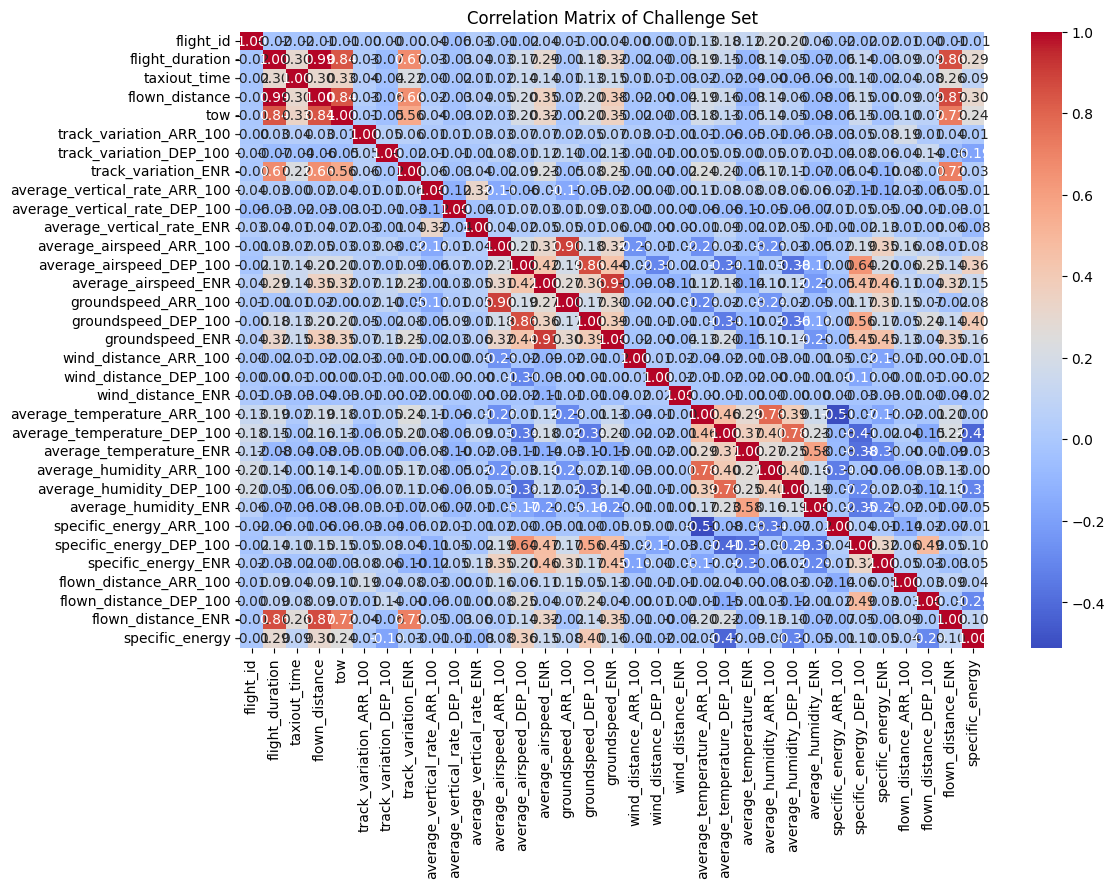

(          flight_id  flight_duration   taxiout_time  flown_distance  \
 count  3.690130e+05    369013.000000  369013.000000   369013.000000   
 mean   2.535220e+08       145.876779      13.489709     1021.728581   
 std    2.688565e+06       139.337587       5.779555     1128.171163   
 min    2.487506e+08         8.000000       0.000000       19.000000   
 25%    2.512296e+08        59.000000      10.000000      338.000000   
 50%    2.536200e+08       100.000000      12.000000      647.000000   
 75%    2.559059e+08       164.000000      16.000000     1113.000000   
 max    2.580745e+08      1013.000000      90.000000     7272.000000   
 
                  tow  track_variation_ARR_100  track_variation_DEP_100  \
 count  369013.000000             3.454850e+05             3.140470e+05   
 mean    79482.257229                      inf                      inf   
 std     53250.919631                      NaN                      NaN   
 min     14944.000000             0.000000e+00    

In [3]:
# Summary statistics of the challenge set
challenge_summary = challenge_set.describe()

# Check for missing values
missing_values = challenge_set.isnull().sum()

# Correlation matrix to check relationships between numerical features
correlation_matrix = challenge_set.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Challenge Set')
plt.show()

# Display the summary statistics and missing values
challenge_summary, missing_values

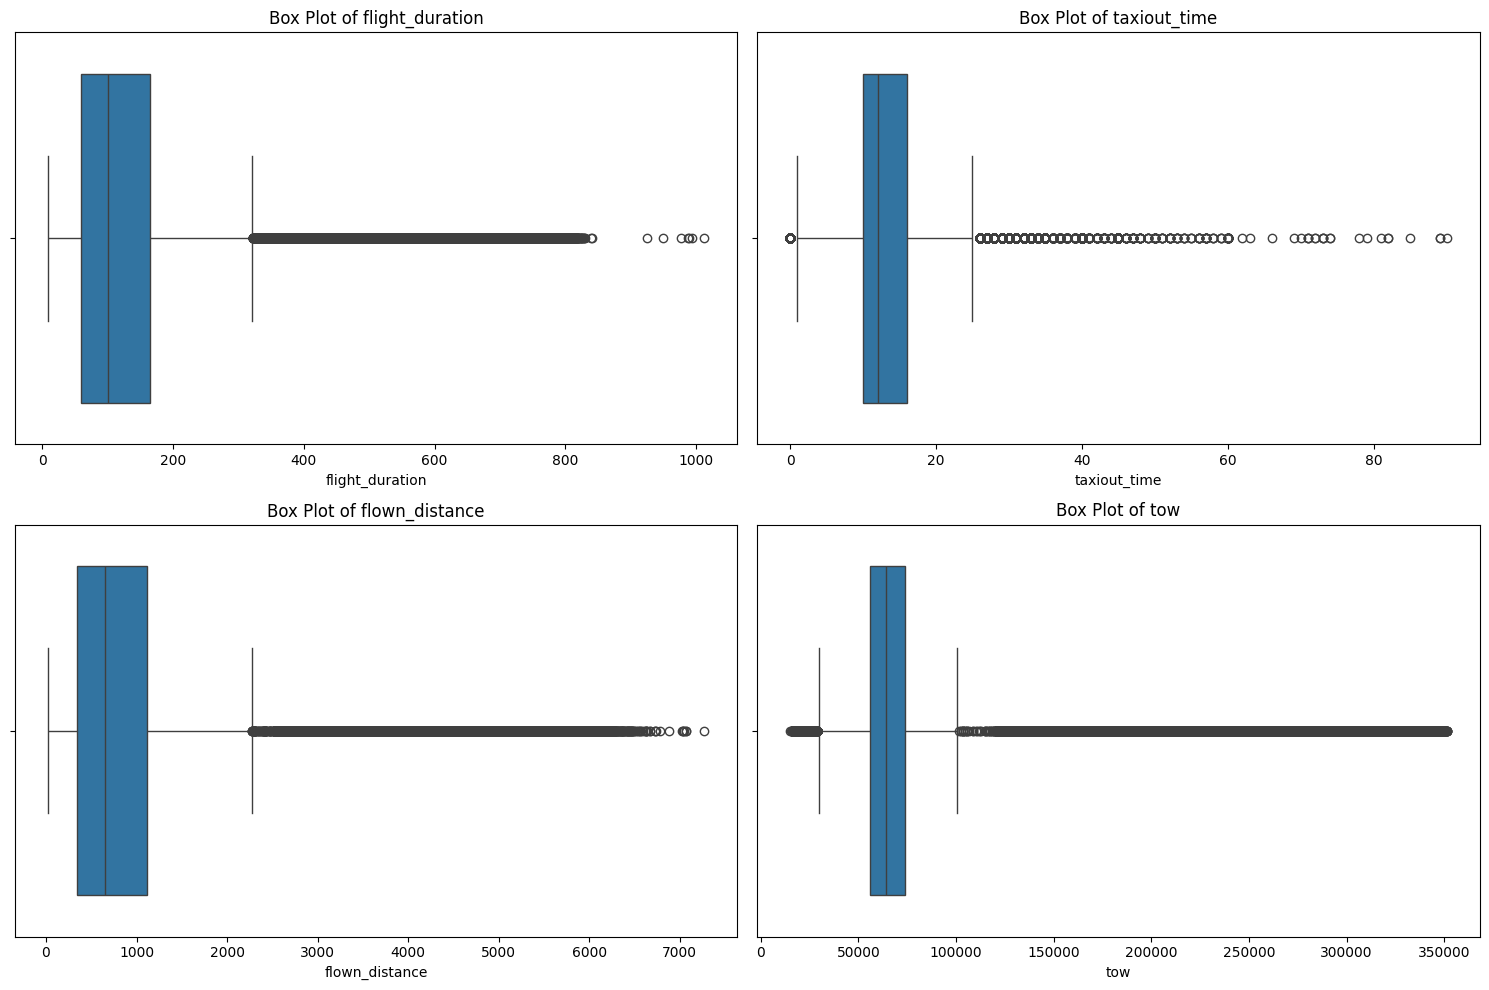

{'flight_duration': 40817,
 'taxiout_time': 10512,
 'flown_distance': 41047,
 'tow': 61165}

In [4]:
# Checking for outliers in numerical features using box plots
numerical_features = ['flight_duration', 'taxiout_time', 'flown_distance', 'tow']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=challenge_set[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Identifying outliers using the Interquartile Range (IQR) method
outliers_info = {}
for feature in numerical_features:
    Q1 = challenge_set[feature].quantile(0.25)
    Q3 = challenge_set[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifying outliers
    outliers = challenge_set[(challenge_set[feature] < lower_bound) | (challenge_set[feature] > upper_bound)]
    outliers_info[feature] = len(outliers)

# Displaying the count of outliers for each feature
outliers_info

# # Removing outliers using the IQR threshold
# def remove_outliers(df, features):
#     for feature in features:
#         Q1 = df[feature].quantile(0.25)
#         Q3 = df[feature].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
#     return df

# # Remove outliers from the challenge set
# cleaned_challenge_set = remove_outliers(challenge_set, numerical_features)

# # Checking the shape of the dataset after outlier removal
# initial_count = len(challenge_set)
# cleaned_count = len(cleaned_challenge_set)

# initial_count, cleaned_count, cleaned_challenge_set.describe()

In [5]:
challenge_set.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
flight_id,248763780,248760618,248753824,248753852,248755934,248762583,248758528,248752667,248762188,248753189,...,258072846,258057853,258071492,258060782,258067496,258058361,258071247,258059152,258072276,258069969
date,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,...,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31
callsign,3840d84f25d3f5fcc0a1be3076bb4039,f6f610e73002b8892a239a81321f7f1d,139670936660762c230ca92556ba842b,509dc61bb54fbab0e5406067c95603e2,d0610d000dcf26b1d7bba8103ecc393d,e6d5d070016d21108f8bd2bd643202ac,1f51e76bb1001c4f9de991288aacb326,52d1b50f92590b36489a929375be10f6,256265f000acb4a06cd680b3df7c9897,8191fa049d6f1a6cb432a98d97bf960c,...,5ea802e68573752dc98d7623d897a915,b1de87e85987c58b0d29fa4e72e3f961,49c815d2ca2e8c50b01473b12fd30119,92eba53fed3c3914105be1de666ca203,80e0832fdc79cbba84dff5e9e06bb883,85ee68e5b7b5acf24ba00d1318eca1e8,570cf7d5ebbd691bcba63e7466607da7,5a7e43e4f981539ae3d3b1cb31591b7c,a1c078516f9f9e90cacec61854cad45b,6c98fcaa191dec632b87b46511f1d2da
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
name_adep,London Heathrow,Barcelona,Stockholm Arlanda,Zurich,Dublin,Oslo,Belfast City,iGA Istanbul,Los Angeles,iGA Istanbul,...,Rome Fiumicino,London Heathrow,iGA Istanbul,Zurich,Hanover,Paris Charles de Gaulle,iGA Istanbul,Dusseldorf,Paris Charles de Gaulle,Madrid Barajas
country_code_adep,GB,ES,SE,CH,IE,NO,GB,TR,US,TR,...,IT,GB,TR,CH,DE,FR,TR,DE,FR,ES
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
name_ades,Cork,Miami,Chicago O'Hare,Philadelphia,London Heathrow,Alicante,London Heathrow,Belgrade,iGA Istanbul,Ankara,...,Brussels,Zurich,Milan Malpensa,Thessaloniki,Vienna,Miami,Berlin Brandenburg,Dublin,Dublin,New York JFK
country_code_ades,IE,US,US,US,GB,ES,GB,RS,TR,TR,...,BE,CH,IT,GR,AT,US,DE,IE,IE,US
actual_offblock_time,2022-01-01T13:46:00Z,2022-01-01T09:55:00Z,2022-01-01T09:39:00Z,2022-01-01T11:04:00Z,2022-01-01T12:36:00Z,2022-01-01T10:24:52Z,2022-01-01T07:41:00Z,2022-01-01T05:21:00Z,2022-01-01T21:26:00Z,2022-01-01T15:00:00Z,...,2022-12-31T09:47:00Z,2022-12-31T09:52:00Z,2022-12-31T09:34:00Z,2022-12-31T09:39:00Z,2022-12-31T09:42:00Z,2022-12-31T09:38:00Z,2022-12-31T09:27:00Z,2022-12-31T09:52:00Z,2022-12-31T09:37:00Z,2022-12-31T09:38:00Z


In [6]:
# Check unique countries in the 'adep' and 'ades' columns
adep_countries = challenge_set['country_code_adep'].unique()
ades_countries = challenge_set['country_code_ades'].unique()

# Combine both lists to get a unique set of countries
all_countries = set(adep_countries).union(set(ades_countries))

# Display the unique countries
print("Unique countries in cleaned_challenge_set:")
print(sorted(all_countries))

Unique countries in cleaned_challenge_set:
['##', 'AE', 'AL', 'AM', 'AN', 'AO', 'AT', 'AW', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BG', 'BH', 'BJ', 'BR', 'BY', 'CA', 'CD', 'CG', 'CH', 'CI', 'CR', 'CU', 'CV', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EE', 'EG', 'ES', 'ET', 'FI', 'FR', 'GB', 'GE', 'GH', 'GI', 'GR', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KG', 'KR', 'KZ', 'LB', 'LC', 'LR', 'LT', 'LU', 'LV', 'MA', 'MD', 'ME', 'MK', 'MN', 'MT', 'MU', 'MX', 'MY', 'NG', 'NL', 'NO', 'NP', 'OM', 'PA', 'PH', 'PK', 'PL', 'PT', 'QA', 'RO', 'RS', 'RU', 'RW', 'SA', 'SD', 'SE', 'SI', 'SK', 'SL', 'SN', 'SO', 'TH', 'TM', 'TN', 'TR', 'TZ', 'UA', 'US', 'UZ', 'VE', 'VN', 'XK', 'ZA']


In [7]:
# Check unique countries in the 'adep' and 'ades' columns
adep_countries = submission_set['country_code_adep'].unique()
ades_countries = submission_set['country_code_ades'].unique()

# Combine both lists to get a unique set of countries
all_countries_sub = set(adep_countries).union(set(ades_countries))

# Display the unique countries
print("Unique countries in cleaned_challenge_set:")
print(sorted(all_countries_sub))

Unique countries in cleaned_challenge_set:
['##', 'AE', 'AL', 'AM', 'AN', 'AT', 'AZ', 'BA', 'BE', 'BG', 'BH', 'BY', 'CA', 'CH', 'CI', 'CR', 'CU', 'CV', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EE', 'EG', 'ER', 'ES', 'FI', 'FR', 'GB', 'GE', 'GR', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KG', 'KZ', 'LB', 'LC', 'LR', 'LT', 'LU', 'LV', 'MA', 'MD', 'ME', 'MK', 'MN', 'MT', 'MX', 'NL', 'NO', 'OM', 'PA', 'PK', 'PL', 'PT', 'QA', 'RO', 'RS', 'RU', 'SA', 'SE', 'SI', 'SK', 'SL', 'SN', 'TH', 'TM', 'TN', 'TR', 'TZ', 'UA', 'US', 'UZ', 'XK', 'ZA']


In [8]:
set(all_countries_sub) - set(all_countries)

{'ER'}

In [9]:
def extract_time_features(df):
    # Converting datetime strings to datetime objects
    df['actual_offblock_time'] = pd.to_datetime(df['actual_offblock_time'])
    df['arrival_time'] = pd.to_datetime(df['arrival_time'])
    
    # Extracting basic time features
    df['offblock_hour'] = df['actual_offblock_time'].dt.hour
    df['offblock_minute'] = df['actual_offblock_time'].dt.minute
    df['offblock_day_of_week'] = df['actual_offblock_time'].dt.dayofweek
    df['offblock_month'] = df['actual_offblock_time'].dt.month
    # df['offblock_day_of_year'] = df['actual_offblock_time'].dt.dayofyear
    df['offblock_week_of_year'] = df['actual_offblock_time'].dt.isocalendar().week
    df['offblock_season'] = df['offblock_month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 
                                                       'Spring' if x in [3, 4, 5] else
                                                       'Summer' if x in [6, 7, 8] else 'Fall')
    
    df['arrival_hour'] = df['arrival_time'].dt.hour
    df['arrival_minute'] = df['arrival_time'].dt.minute

    # Calculating the duration in minutes between offblock and arrival
    df['offblock_to_arrival_duration'] = (df['arrival_time'] - df['actual_offblock_time']).dt.total_seconds() / 60
    
    # Adding boolean flags for weekends and rush hours
    df['is_offblock_weekend'] = df['offblock_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    df['is_offblock_rush_hour'] = df['offblock_hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 18 else 0)
    
    return df

# Creating additional duration-based features
def create_duration_features(df):
    # Replace zero or negative values in flight_duration to avoid division errors
    df['flight_duration'] = df['flight_duration'].replace(0, np.nan)
    df['taxiout_time'] = df['taxiout_time'].replace(0, np.nan)
    
    # Fill NaN values in taxiout_time with the median or a reasonable default
    df['taxiout_time'] = df['taxiout_time'].fillna(df['taxiout_time'].median())
    
    # Calculating the ratio of taxiout time to flight duration with error handling
    df['taxi_ratio'] = df.apply(lambda row: row['taxiout_time'] / row['flight_duration'] 
                                if pd.notnull(row['flight_duration']) else np.nan, axis=1)
    
    # Fill NaN values in taxi_ratio with 0 or a reasonable default (e.g., the median of taxi_ratio)
    df['taxi_ratio'] = df['taxi_ratio'].fillna(df['taxi_ratio'].median())
    
    # Calculating the average flight speed (distance per minute) with error handling
    df['flight_speed'] = df.apply(lambda row: row['flown_distance'] / row['flight_duration'] 
                                  if pd.notnull(row['flown_distance']) and pd.notnull(row['flight_duration']) else np.nan, axis=1)
    
    # Fill NaN values in flight_speed with the median value or a reasonable default
    df['flight_speed'] = df['flight_speed'].fillna(df['flight_speed'].median())
    
    # Normalizing taxi_ratio by the median value to control for large values
    df['normalized_taxi_ratio'] = df['taxi_ratio'] / df['taxi_ratio'].median()
    
    # Categorical features for flight duration buckets
    df['flight_duration_category'] = pd.cut(df['flight_duration'], bins=[0, 60, 180, 300, np.inf], 
                                            labels=['Very Short', 'Short', 'Medium', 'Long'], right=False)
    
    # Speed per distance feature for more detailed analysis
    df['speed_per_distance'] = df.apply(lambda row: row['flight_speed'] / row['flown_distance'] 
                                        if pd.notnull(row['flight_speed']) and pd.notnull(row['flown_distance']) else np.nan, axis=1)
    
    # Fill NaN values in speed_per_distance with the median value or a reasonable default
    df['speed_per_distance'] = df['speed_per_distance'].fillna(df['speed_per_distance'].median())
    
    # Cumulative mean of flight speed to capture trends over time (if data is ordered by time)
    df['cumulative_avg_speed'] = df['flight_speed'].expanding().mean()
    
    # Handling edge cases and setting up conditions for further analysis
    df['taxi_ratio'] = df['taxi_ratio'].replace([np.inf, -np.inf], np.nan)
    df['flight_speed'] = df['flight_speed'].replace([np.inf, -np.inf], np.nan)
    
    return df


# Grouping airports by region based on country codes
def group_airports_by_region(df):
    # Define country groups for regions
    europe_countries = ['GB', 'FR', 'DE', 'ES', 'IT', 'SE', 'CH', 'NL', 'AT', 'IE', 'BE', 'DK', 'FI', 'GR', 'HU', 
                        'IS', 'LT', 'LU', 'LV', 'MT', 'NO', 'PL', 'PT', 'RO', 'SI', 'SK', 'CZ', 'EE', 'BG', 'CY']
    north_america_countries = ['US', 'CA', 'MX']
    south_america_countries = ['BR', 'AR', 'CL', 'CO', 'PE', 'VE', 'UY', 'PY', 'BO', 'EC', 'GY', 'SR']
    middle_east_countries = ['AE', 'SA', 'IL', 'IR', 'IQ', 'JO', 'KW', 'OM', 'QA', 'BH', 'LB', 'SY', 'YE']
    asia_countries = ['JP', 'CN', 'KR', 'IN', 'PK', 'BD', 'VN', 'PH', 'TH', 'MY', 'ID', 'SG', 'MN', 'KZ', 'TM', 'UZ', 'KG']
    africa_countries = ['ZA', 'NG', 'EG', 'DZ', 'MA', 'KE', 'TZ', 'GH', 'ET', 'CI', 'SN', 'SD', 'AO', 'LR', 'RW', 'ER']
    other_countries = set(df['country_code_adep'].unique()).union(set(df['country_code_ades'].unique())) - set(europe_countries + 
                       north_america_countries + south_america_countries + middle_east_countries + asia_countries + africa_countries)

    # Apply region categorization based on country codes
    def categorize_region(code):
        if code in europe_countries:
            return 'Europe'
        elif code in north_america_countries:
            return 'North America'
        elif code in south_america_countries:
            return 'South America'
        elif code in middle_east_countries:
            return 'Middle East'
        elif code in asia_countries:
            return 'Asia'
        elif code in africa_countries:
            return 'Africa'
        elif code in other_countries:
            return 'Other'
        else:
            return 'Unknown'

    # Apply region classification for adep and ades
    df['adep_region'] = df['country_code_adep'].apply(categorize_region)
    df['ades_region'] = df['country_code_ades'].apply(categorize_region)

    return df

# Update functions to remove original columns where applicable
def extract_country_features(df):
    # Basic feature indicating if the flight is within the same country
    df['same_country_flight'] = (df['country_code_adep'] == df['country_code_ades']).astype(int)

    # Feature indicating if the flight is within the same region
    df['same_region_flight'] = (df['adep_region'] == df['ades_region']).astype(int)

    # Flight direction based on regions: North-South, East-West, or Other
    df['flight_direction'] = df.apply(lambda row: 'North-South' if row['adep_region'] in ['North America', 'Europe'] and
                                                      row['ades_region'] in ['South America', 'Africa'] else
                                                      'East-West' if row['adep_region'] in ['Europe', 'Asia'] and 
                                                      row['ades_region'] in ['North America'] else 'Other', axis=1)

    # Create a feature indicating if the flight is intercontinental
    intercontinental_regions = ['Europe', 'North America', 'South America', 'Middle East', 'Asia', 'Africa']
    df['is_intercontinental'] = df.apply(
        lambda row: 1 if row['adep_region'] in intercontinental_regions and 
                         row['ades_region'] in intercontinental_regions and 
                         row['adep_region'] != row['ades_region'] else 0, axis=1)
    return df

# Function to remove original columns after feature extraction
def remove_columns(df, columns_to_remove):
    # Removing original datetime columns since features have been extracted
    df = df.drop(columns_to_remove, axis=1)
    return df

# List of columns to remove after feature extraction
columns_to_remove = ['name_adep', 'name_ades', 'country_code_adep', 'country_code_ades', 'flight_id', 'callsign', 'date', 'actual_offblock_time', 'arrival_time', 'flight_duration']

# Applying functions to the challenge set
cleaned_challenge_set = extract_time_features(challenge_set)
cleaned_challenge_set = create_duration_features(cleaned_challenge_set)
cleaned_challenge_set = group_airports_by_region(cleaned_challenge_set)
cleaned_challenge_set = extract_country_features(cleaned_challenge_set)
cleaned_challenge_set = remove_columns(cleaned_challenge_set, columns_to_remove)

# Applying functions to the submission set
cleaned_submission_set = extract_time_features(submission_set)
cleaned_submission_set = create_duration_features(cleaned_submission_set)
cleaned_submission_set = group_airports_by_region(cleaned_submission_set)
cleaned_submission_set = extract_country_features(cleaned_submission_set)
cleaned_submission_set = remove_columns(cleaned_submission_set, columns_to_remove)

# Display the transposed first few rows of the updated challenge set for review
cleaned_challenge_set.T

/tmp/ipykernel_127923/1767009025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_offblock_time'] = pd.to_datetime(df['actual_offblock_time'])
/tmp/ipykernel_127923/1767009025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_time'] = pd.to_datetime(df['arrival_time'])
/tmp/ipykernel_127923/1767009025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,A320,A21N,A321,A320,E195,B788,A21N,A320,A21N,B772
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,M,M,M,H,M,M,M,H
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,bdeeef3a675587d530de70a25d7118d2,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1
taxiout_time,18.0,13.0,15.0,11.0,14.0,27.0,10.0,25.0,10.0,25.0,...,18.0,19.0,25.0,9.0,8.0,21.0,25.0,11.0,12.0,16.0
flown_distance,321,4193,3770,3607,305,1434,295,458,6354,257,...,726,449,975,782,416,4046,946,522,466,3213
tow,54748.0,185441.0,230396.0,157615.0,70318.447226,57721.0,56818.0,60678.0,235632.0,73571.0,...,61804.035897,72756.0,73571.0,64826.0,40868.0,163438.0,78707.0,62942.75,72611.161024,195373.0
track_variation_ARR_100,124.339907,179.31889,179.638848,0.208347,NaN,129.426353,156.984462,17.706362,23.829551,119.350942,...,41.225296,64.982306,NaN,38.67806,70.340447,174.768738,62.54495,43.910303,48.439184,NaN
track_variation_DEP_100,39.704139,8.910306,32.391881,36.998783,174.878799,22.836441,86.126276,178.849514,NaN,NaN,...,107.075354,174.543182,0.397226,0.815619,11.825033,9.528459,22.872438,18.479277,28.660678,23.802205


In [10]:
challenge_set['aircraft_type'].value_counts()

aircraft_type
A320    79761
A20N    37944
B738    37495
A321    29423
E195    24914
A21N    23257
CRJ9    22926
A319    17578
A333    17011
B38M    12330
BCS3    11936
B77W     9162
B772     8322
AT76     6897
B788     5960
B789     5734
BCS1     4649
B737     3627
A332     2241
E190     2105
B739     1793
A359     1725
B763     1190
B39M      542
A343      480
B752        6
A310        2
B773        1
C56X        1
E290        1
Name: count, dtype: int64

In [11]:
# Extracting unique aircraft types from each set
challenge_aircraft_types = set(challenge_set['aircraft_type'].unique())
submission_aircraft_types = set(submission_set['aircraft_type'].unique())

# Aircraft types in challenge_set but not in submission_set
only_in_challenge = challenge_aircraft_types - submission_aircraft_types
print("Aircraft types only in challenge_set:", only_in_challenge)

# Aircraft types in submission_set but not in challenge_set
only_in_submission = submission_aircraft_types - challenge_aircraft_types
print("Aircraft types only in submission_set:", only_in_submission)


Aircraft types only in challenge_set: {'C56X', 'A310'}
Aircraft types only in submission_set: set()


In [12]:
# Load the FAA Aircraft Characteristics Database from the uploaded Excel file
file_path = "./extra_data/FAA-Aircraft-Char-DB-AC-150-5300-13B-App-2023-09-07.xlsx"

# Load the FAA dataset and select relevant columns
faa_data = pd.read_excel(file_path, sheet_name='ACD_Data')

# Select relevant columns for merging
faa_relevant_columns = [
    'FAA_Designator', 'MTOW_lb', 'MALW_lb', 'Manufacturer', 'Model_FAA',
    'Physical_Class_Engine', 'Num_Engines', 'Approach_Speed_knot', 
    'FAA_Weight'
]

# Prepare the FAA data for merging
faa_clean = faa_data[faa_relevant_columns].dropna()

# Convert MTOW and MALW from pounds to kilograms for consistency
faa_clean['MTOW_kg'] = faa_clean['MTOW_lb'] * 0.453592
faa_clean['MALW_kg'] = faa_clean['MALW_lb'] * 0.453592

# Merge the cleaned_challenge_set with FAA data on aircraft_type and FAA_Designator
cleaned_challenge_set = cleaned_challenge_set.merge(
    faa_clean, how='left', left_on='aircraft_type', right_on='FAA_Designator'
)

# Merge the cleaned_submission_set with FAA data on aircraft_type and FAA_Designator
cleaned_submission_set = cleaned_submission_set.merge(
    faa_clean, how='left', left_on='aircraft_type', right_on='FAA_Designator'
)
cleaned_challenge_set.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,A320,A21N,A321,A320,E195,B788,A21N,A320,A21N,B772
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,M,M,M,H,M,M,M,H
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,bdeeef3a675587d530de70a25d7118d2,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Num_Engines,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Approach_Speed_knot,136.0,140.0,137.0,144.0,136.0,137.0,136.0,144.0,144.0,142.0,...,136.0,136.0,142.0,136.0,135.0,144.0,136.0,136.0,136.0,140.0
FAA_Weight,Large,Heavy,Heavy,Heavy,Large,Large,Large,Large,Heavy,Large,...,Large,Large,Large,Large,Large,Heavy,Large,Large,Large,Heavy
MTOW_kg,78000.133912,297556.352,241999.950248,227929.98,94999.854888,78999.85068,78000.133912,79015.7264,254011.52,91000.080632,...,78000.133912,94999.854888,91000.080632,78000.133912,52290.08576,227929.98,94999.854888,78000.133912,94999.854888,297556.352


In [13]:
cleaned_challenge_set.drop(["FAA_Designator", "MTOW_lb", "MALW_lb"], axis=1, inplace=True)
cleaned_submission_set.drop(["FAA_Designator", "MTOW_lb", "MALW_lb"], axis=1, inplace=True)

In [14]:
# Check for unique aircraft types in the cleaned challenge set
unique_aircraft_types = cleaned_challenge_set['aircraft_type'].unique()

# Check which aircraft types from the challenge set are not present in the FAA data
missing_aircraft_types = [atype for atype in unique_aircraft_types if atype not in faa_data['FAA_Designator'].unique()]

missing_aircraft_types


[]

In [15]:
# Load the GlobalAirportDatabase.txt into a DataFrame
columns_global = ['ICAO', 'IATA', 'Airport Name', 'City/Town', 'Country', 
                  'Latitude Degrees', 'Latitude Minutes', 'Latitude Seconds', 'Latitude Direction',
                  'Longitude Degrees', 'Longitude Minutes', 'Longitude Seconds', 'Longitude Direction',
                  'Altitude', 'Latitude Decimal Degrees', 'Longitude Decimal Degrees']
global_airports = pd.read_csv('./extra_data/GlobalAirportDatabase.txt', sep=':', header=None, names=columns_global)

# Select relevant columns including Altitude (ICAO, Latitude Decimal Degrees, Longitude Decimal Degrees, Altitude)
global_airports = global_airports[['ICAO', 'Latitude Decimal Degrees', 'Longitude Decimal Degrees', 'Altitude']]

# Load the airports.dat file (assuming previous naming and structure)
columns_openflights = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 
                       'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 
                       'Type', 'Source']
openflights_airports = pd.read_csv('./extra_data/airports.dat', header=None, names=columns_openflights)

# Select relevant columns including Altitude (ICAO, Latitude Decimal Degrees, Longitude Decimal Degrees, Altitude)
openflights_airports = openflights_airports[['ICAO', 'Latitude', 'Longitude', 'Altitude']]
openflights_airports.rename(columns={'Latitude': 'Latitude Decimal Degrees', 
                                     'Longitude': 'Longitude Decimal Degrees'}, inplace=True)

# Concatenate both datasets, removing duplicates based on ICAO codes
airports = pd.concat([global_airports, openflights_airports]).drop_duplicates(subset=['ICAO'])

# Display the combined dataset to verify the merge
airports.head()

,ICAO,Latitude Decimal Degrees,Longitude Decimal Degrees,Altitude
0,AYGA,-6.082,145.392,1610
1,AYLA,0.000,0.000,0
2,AYMD,-5.207,145.789,7
3,AYMH,-5.826,144.296,1643
4,AYNZ,-6.570,146.726,73


In [16]:
# Backup
backup_challenge_set = cleaned_challenge_set.copy()

# Merge airports data to cleaned_challenge_set for both departure (adep) and arrival (ades) airports

# Merge for adep (departure airport)
cleaned_challenge_set = pd.merge(
    cleaned_challenge_set, airports, 
    how='left', left_on='adep', right_on='ICAO', 
    suffixes=('_adep', '')
)

# Rename latitude, longitude, and altitude columns for adep correctly
cleaned_challenge_set.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_adep', 
        'Longitude Decimal Degrees': 'Longitude_adep',
        'Altitude': 'Altitude_adep'
    }, 
    inplace=True
)

# Merge for ades (arrival airport)
cleaned_challenge_set = pd.merge(
    cleaned_challenge_set, airports, 
    how='left', left_on='ades', right_on='ICAO', 
    suffixes=('', '_ades')
)

# Rename latitude, longitude, and altitude columns for ades correctly
cleaned_challenge_set.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_ades', 
        'Longitude Decimal Degrees': 'Longitude_ades',
        'Altitude': 'Altitude_ades'
    }, 
    inplace=True
)

# Display the transposed DataFrame to confirm the correct columns are retained
cleaned_challenge_set.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,A320,A21N,A321,A320,E195,B788,A21N,A320,A21N,B772
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,M,M,M,H,M,M,M,H
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,bdeeef3a675587d530de70a25d7118d2,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Altitude_adep,25.0,4.0,38.0,432.0,74.0,208.0,5.0,325.0,39.0,325.0,...,4.0,25.0,325.0,432.0,56.0,120.0,325.0,45.0,120.0,610.0
ICAO_ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
Latitude_ades,51.843,25.793,41.979,39.872,51.477,38.282,51.477,44.818,41.275278,40.128,...,50.902,47.465,45.631,40.52,48.11,25.793,52.38,53.421,53.421,40.64
Longitude_ades,-8.492,-80.291,-87.904,-75.241,-0.461,-0.558,-0.461,20.309,28.751944,32.995,...,4.499,8.549,8.728,22.971,16.57,-80.291,13.523,-6.27,-6.27,-73.779


In [17]:
# Count missing values for each column in the cleaned_challenge_set DataFrame
missing_values = cleaned_challenge_set.isnull().sum()

# Identify columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Specifically count the unique missing ICAO codes by examining columns related to ICAO information
# Assuming 'adep' and 'ades' are the columns where ICAO codes are merged
missing_icaos_adep = cleaned_challenge_set[cleaned_challenge_set['Latitude_adep'].isnull()]['adep'].unique()
missing_icaos_ades = cleaned_challenge_set[cleaned_challenge_set['Latitude_ades'].isnull()]['ades'].unique()

# Combine both lists to find unique ICAO codes missing in both 'adep' and 'ades'
unique_missing_icaos = set(missing_icaos_adep).union(set(missing_icaos_ades))

# Count the number of unique ICAO codes missing
unique_missing_count = len(unique_missing_icaos)

unique_missing_count, unique_missing_icaos

(9, {'HSSK', 'LFTM', 'LTFG', 'LTFO', 'UCFM', 'UTFF', 'VGHS', 'VOGO', 'ZMCK'})

In [18]:
challenge_set['taxiout_time'].iloc[827]

12.0

In [19]:
cleaned_challenge_set['taxiout_time'].iloc[827]

12.0

In [20]:
# Display rows in the DataFrame that have missing values in any column
rows_with_missing_values = cleaned_challenge_set[cleaned_challenge_set.isnull().any(axis=1)]

# Display the rows with missing values
rows_with_missing_values.T

,1,4,5,6,7,8,9,10,12,14,...,368997,368999,369000,369001,369003,369005,369006,369007,369008,369012
adep,LEBL,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,LOWW,ESSA,LTAT,...,KMIA,EPWA,LTFM,LSGG,LIRF,LTFM,LSZH,EDDV,LFPG,LEMD
ades,KMIA,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,EDDM,ESMS,LTAC,...,LLBG,LOWW,LEBL,EIDW,EBBR,LIMC,LGTS,LOWW,KMIA,KJFK
aircraft_type,B772,A21N,A20N,A320,B738,B789,A321,A320,CRJ9,B738,...,B788,E195,A21N,A320,A320,A321,A320,E195,B788,B772
wtc,H,M,M,M,M,H,M,M,M,M,...,H,M,M,M,M,M,M,M,H,H
airline,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,5d407cb11cc29578cc3e292e743f5393,8be5c854fd664bcb97fb543339f74770,6351ec1b849adacc0cbb3b1313d8d39b,...,5543e4dc327359ffaf5b9c0e6faaf0e1,5d407cb11cc29578cc3e292e743f5393,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,bdeeef3a675587d530de70a25d7118d2,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,5543e4dc327359ffaf5b9c0e6faaf0e1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Altitude_adep,4.0,74.0,208.0,5.0,325.0,39.0,325.0,183.0,38.0,862.0,...,3.0,111.0,325.0,431.0,4.0,325.0,432.0,56.0,120.0,610.0
ICAO_ades,KMIA,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,EDDM,ESMS,LTAC,...,LLBG,LOWW,LEBL,EIDW,EBBR,LIMC,LGTS,LOWW,KMIA,KJFK
Latitude_ades,25.793,51.477,38.282,51.477,44.818,41.275278,40.128,48.354,55.53,40.128,...,32.009,48.11,41.297,53.421,50.902,45.631,40.52,48.11,25.793,40.64
Longitude_ades,-80.291,-0.461,-0.558,-0.461,20.309,28.751944,32.995,11.786,13.371,32.995,...,34.877,16.57,2.078,-6.27,4.499,8.728,22.971,16.57,-80.291,-73.779


In [21]:
# Applying the same transformations for submission_set as described for challenge_set

# Backup
backup_submission_set = cleaned_submission_set.copy()

# Filter updated_airports to include only ICAO codes present in cleaned_submission_set (adep and ades)
relevant_icaos_submission = cleaned_submission_set['adep'].unique().tolist() + cleaned_submission_set['ades'].unique().tolist()
filtered_airports_submission = airports[airports['ICAO'].isin(relevant_icaos_submission)]

# Merge airports data to submission_set for both departure (adep) and arrival (ades) airports
# Merge for adep (departure airport)
cleaned_submission_set = pd.merge(
    cleaned_submission_set, filtered_airports_submission, 
    how='left', left_on='adep', right_on='ICAO', 
    suffixes=('_adep', '')
)

# Rename latitude, longitude, and altitude columns for adep correctly
cleaned_submission_set.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_adep', 
        'Longitude Decimal Degrees': 'Longitude_adep',
        'Altitude': 'Altitude_adep'
    }, 
    inplace=True
)

# Merge for ades (arrival airport)
cleaned_submission_set = pd.merge(
    cleaned_submission_set, filtered_airports_submission, 
    how='left', left_on='ades', right_on='ICAO', 
    suffixes=('', '_ades')
)

# Rename latitude, longitude, and altitude columns for ades correctly
cleaned_submission_set.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_ades', 
        'Longitude Decimal Degrees': 'Longitude_ades',
        'Altitude': 'Altitude_ades'
    }, 
    inplace=True
)

cleaned_submission_set.T

,0,1,2,3,4,5,6,7,8,9,...,105949,105950,105951,105952,105953,105954,105955,105956,105957,105958
adep,LTFJ,EBBR,KMIA,EGCN,EIDW,LTFJ,EGLL,LSZH,EGLL,LEMD,...,BKPR,LTFJ,KORD,KJFK,KSFO,LTFJ,LOWW,LTFM,EHAM,UBBB
ades,LFLL,KJFK,EGLL,LEAL,LFLL,LTAC,EIDW,EDDH,EICK,EIDW,...,LSGG,LFLL,EGLL,LEBL,EIDW,EKCH,KIAD,LSZH,EDDF,LTFM
aircraft_type,B738,A333,B77W,B38M,A320,B738,A320,A320,A320,A320,...,BCS3,B738,B789,B772,A333,B38M,B763,A321,A320,B738
wtc,M,H,H,M,M,M,M,M,M,M,...,M,M,H,H,H,M,H,M,M,M
airline,6351ec1b849adacc0cbb3b1313d8d39b,bdeeef3a675587d530de70a25d7118d2,5543e4dc327359ffaf5b9c0e6faaf0e1,3922524069809ac4326134429751e26f,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,2d5def0a5a844b343ba1b7cc9cb28fa9,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,...,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,5543e4dc327359ffaf5b9c0e6faaf0e1,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,5d407cb11cc29578cc3e292e743f5393,6351ec1b849adacc0cbb3b1313d8d39b,f502877cab405652cf0dd70c2213e730,6351ec1b849adacc0cbb3b1313d8d39b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Altitude_adep,312.0,57.0,3.0,55.0,74.0,312.0,25.0,432.0,25.0,610.0,...,1789.0,312.0,204.0,4.0,4.0,312.0,183.0,325.0,-3.0,4.0
ICAO_ades,LFLL,KJFK,EGLL,LEAL,LFLL,LTAC,EIDW,EDDH,EICK,EIDW,...,LSGG,LFLL,EGLL,LEBL,EIDW,EKCH,KIAD,LSZH,EDDF,LTFM
Latitude_ades,45.726,40.64,51.477,38.282,45.726,40.128,53.421,53.63,51.843,53.421,...,46.238,45.726,51.477,41.297,53.421,55.618,38.944,47.465,50.026,41.275278
Longitude_ades,5.091,-73.779,-0.461,-0.558,5.091,32.995,-6.27,9.988,-8.492,-6.27,...,6.109,5.091,-0.461,2.078,-6.27,12.656,-77.456,8.549,8.543,28.751944


In [22]:
# Count missing values for each column in the submission_set_updated DataFrame
missing_values_submission = cleaned_submission_set.isnull().sum()

# Identify columns with missing values
columns_with_missing_submission = missing_values_submission[missing_values_submission > 0]

# Specifically count the unique missing ICAO codes by examining columns related to ICAO information
missing_icaos_adep_submission = cleaned_submission_set[cleaned_submission_set['Latitude_adep'].isnull()]['adep'].unique()
missing_icaos_ades_submission = cleaned_submission_set[cleaned_submission_set['Latitude_ades'].isnull()]['ades'].unique()

# Combine both lists to find unique ICAO codes missing in both 'adep' and 'ades'
unique_missing_icaos_submission = set(missing_icaos_adep_submission).union(set(missing_icaos_ades_submission))

# Count the number of unique ICAO codes missing
unique_missing_count_submission = len(unique_missing_icaos_submission)

unique_missing_count_submission, unique_missing_icaos_submission

(6, {'LTFG', 'LTFO', 'UCFM', 'UTFF', 'VOGO', 'ZMCK'})

In [23]:
# Coordinates for the given ICAO codes

new_airports = {
    'ICAO': ['CYHZ', 'EDDE', 'KDAB', 'KRFD', 'LIPO', 'LTAP', 'HSSK', 'LFTM', 'LTFG', 
             'LTFO', 'UCFM', 'UTFF', 'VGHS', 'VOGO', 'ZMCK'],
    'Latitude Decimal Degrees': [44.8800, 50.9798, 29.1799, 42.1954, 45.4289, 40.0714, 
                                 15.5895, 40.9769, 36.2994, 38.7262, 43.0613, 40.3581, 
                                 23.8433, 15.3808, 48.1357],
    'Longitude Decimal Degrees': [-63.5086, 10.9581, -81.0581, -89.0972, 10.3306, 32.5644, 
                                  32.5532, 28.8146, 32.3006, 30.6015, 74.4776, 71.7450, 
                                  90.3978, 73.8314, 114.6460],
    'Altitude': [145, 316, 11, 224, 109, 535, 386, 35, 28, 1003, 627, 577, 8, 56, 751]
}

# Convert new airports data to DataFrame
new_airports_df = pd.DataFrame(new_airports)

# Append the new rows to the existing DataFrame
updated_airports = pd.concat([airports, new_airports_df], ignore_index=True)

updated_airports = updated_airports.drop_duplicates(subset=['ICAO'])

In [24]:
# Filter updated_airports to include only ICAO codes present in df (adep and ades)
relevant_icaos_challenge = backup_challenge_set['adep'].unique().tolist() + backup_challenge_set['ades'].unique().tolist()
filtered_airports_challenge = updated_airports[updated_airports['ICAO'].isin(relevant_icaos_challenge)]

# Merge airports data to cleaned_challenge_set for both departure (adep) and arrival (ades) airports
# Merge for adep (departure airport)
challenge_set_updated = pd.merge(
    backup_challenge_set, filtered_airports_challenge, 
    how='left', left_on='adep', right_on='ICAO', 
    suffixes=('_adep', '')
)

# Rename latitude, longitude, and altitude columns for adep correctly
challenge_set_updated.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_adep', 
        'Longitude Decimal Degrees': 'Longitude_adep',
        'Altitude': 'Altitude_adep'
    }, 
    inplace=True
)

# Merge for ades (arrival airport)
challenge_set_updated = pd.merge(
    challenge_set_updated, filtered_airports_challenge, 
    how='left', left_on='ades', right_on='ICAO', 
    suffixes=('', '_ades')
)

# Rename latitude, longitude, and altitude columns for ades correctly
challenge_set_updated.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_ades', 
        'Longitude Decimal Degrees': 'Longitude_ades',
        'Altitude': 'Altitude_ades'
    }, 
    inplace=True)


# Display the transposed DataFrame to confirm the correct columns are retained
challenge_set_updated.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,A320,A21N,A321,A320,E195,B788,A21N,A320,A21N,B772
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,M,M,M,H,M,M,M,H
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,bdeeef3a675587d530de70a25d7118d2,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Altitude_adep,25,4,38,432,74,208,5,325,39,325,...,4,25,325,432,56,120,325,45,120,610
ICAO_ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
Latitude_ades,51.843,25.793,41.979,39.872,51.477,38.282,51.477,44.818,41.275278,40.128,...,50.902,47.465,45.631,40.52,48.11,25.793,52.38,53.421,53.421,40.64
Longitude_ades,-8.492,-80.291,-87.904,-75.241,-0.461,-0.558,-0.461,20.309,28.751944,32.995,...,4.499,8.549,8.728,22.971,16.57,-80.291,13.523,-6.27,-6.27,-73.779


In [25]:
# Count missing values for each column in the cleaned_challenge_set DataFrame
missing_values = challenge_set_updated.isnull().sum()

# Identify columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Specifically count the unique missing ICAO codes by examining columns related to ICAO information
# Assuming 'adep' and 'ades' are the columns where ICAO codes are merged
missing_icaos_adep = challenge_set_updated[challenge_set_updated['Latitude_adep'].isnull()]['adep'].unique()
missing_icaos_ades = challenge_set_updated[challenge_set_updated['Latitude_ades'].isnull()]['ades'].unique()

# Combine both lists to find unique ICAO codes missing in both 'adep' and 'ades'
unique_missing_icaos = set(missing_icaos_adep).union(set(missing_icaos_ades))

# Count the number of unique ICAO codes missing
unique_missing_count = len(unique_missing_icaos)

unique_missing_count, unique_missing_icaos

(0, set())

In [26]:
# Display rows in the DataFrame that have missing values in any column
rows_with_missing_values = challenge_set_updated[challenge_set_updated.isnull().any(axis=1)]

# Display the rows with missing values
rows_with_missing_values

,adep,ades,aircraft_type,wtc,airline,taxiout_time,flown_distance,tow,track_variation_ARR_100,track_variation_DEP_100,...,MTOW_kg,MALW_kg,ICAO,Latitude_adep,Longitude_adep,Altitude_adep,ICAO_ades,Latitude_ades,Longitude_ades,Altitude_ades
1,LEBL,KMIA,B772,H,5543e4dc327359ffaf5b9c0e6faaf0e1,13.0,4193,185441.000000,179.318890,8.910306,...,297556.352000,213188.240000,LEBL,41.297000,2.078000,4,KMIA,25.793,-80.291,3
4,EIDW,EGLL,A21N,M,a73f82288988b79be490c6322f4c32ed,14.0,305,70318.447226,NaN,174.878799,...,94999.854888,79199.884752,EIDW,53.421000,-6.270000,74,EGLL,51.477,-0.461,25
5,ENGM,LEAL,A20N,M,8be5c854fd664bcb97fb543339f74770,27.0,1434,57721.000000,129.426353,22.836441,...,78999.850680,67399.688872,ENGM,60.194000,11.100000,208,LEAL,38.282,-0.558,44
6,EGAC,EGLL,A320,M,a73f82288988b79be490c6322f4c32ed,10.0,295,56818.000000,156.984462,86.126276,...,78000.133912,65999.903960,EGAC,54.618000,-5.873000,5,EGLL,51.477,-0.461,25
7,LTFM,LYBE,B738,M,6351ec1b849adacc0cbb3b1313d8d39b,25.0,458,60678.000000,17.706362,178.849514,...,79015.726400,66349.169800,LTFM,41.275278,28.751944,325,LYBE,44.818,20.309,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369005,LTFM,LIMC,A321,M,6351ec1b849adacc0cbb3b1313d8d39b,25.0,975,73571.000000,NaN,0.397226,...,91000.080632,77800.099840,LTFM,41.275278,28.751944,325,LIMC,45.631,8.728,234
369006,LSZH,LGTS,A320,M,2d5def0a5a844b343ba1b7cc9cb28fa9,9.0,782,64826.000000,38.678060,0.815619,...,78000.133912,65999.903960,LSZH,47.465000,8.549000,432,LGTS,40.520,22.971,7
369007,EDDV,LOWW,E195,M,5d407cb11cc29578cc3e292e743f5393,8.0,416,40868.000000,70.340447,11.825033,...,52290.085760,45800.091424,EDDV,52.461000,9.685000,56,LOWW,48.110,16.570,183
369008,LFPG,KMIA,B788,H,5543e4dc327359ffaf5b9c0e6faaf0e1,21.0,4046,163438.000000,174.768738,9.528459,...,227929.980000,172364.960000,LFPG,49.013000,2.550000,120,KMIA,25.793,-80.291,3


In [27]:
# Applying the same transformations for submission_set as described for challenge_set

# Filter updated_airports to include only ICAO codes present in df (adep and ades)
relevant_icaos_submission = backup_submission_set['adep'].unique().tolist() + backup_submission_set['ades'].unique().tolist()
filtered_airports_submission = updated_airports[updated_airports['ICAO'].isin(relevant_icaos_submission)]

# Merge airports data to submission_set for both departure (adep) and arrival (ades) airports
# Merge for adep (departure airport)
submission_set_updated = pd.merge(
    backup_submission_set, filtered_airports_submission, 
    how='left', left_on='adep', right_on='ICAO', 
    suffixes=('_adep', '')
)

# Rename latitude, longitude, and altitude columns for adep correctly
submission_set_updated.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_adep', 
        'Longitude Decimal Degrees': 'Longitude_adep',
        'Altitude': 'Altitude_adep'
    }, 
    inplace=True
)

# Merge for ades (arrival airport)
submission_set_updated = pd.merge(
    submission_set_updated, filtered_airports_submission, 
    how='left', left_on='ades', right_on='ICAO', 
    suffixes=('', '_ades')
)

# Rename latitude, longitude, and altitude columns for ades correctly
submission_set_updated.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_ades', 
        'Longitude Decimal Degrees': 'Longitude_ades',
        'Altitude': 'Altitude_ades'
    }, 
    inplace=True
)

submission_set_updated.T

,0,1,2,3,4,5,6,7,8,9,...,105949,105950,105951,105952,105953,105954,105955,105956,105957,105958
adep,LTFJ,EBBR,KMIA,EGCN,EIDW,LTFJ,EGLL,LSZH,EGLL,LEMD,...,BKPR,LTFJ,KORD,KJFK,KSFO,LTFJ,LOWW,LTFM,EHAM,UBBB
ades,LFLL,KJFK,EGLL,LEAL,LFLL,LTAC,EIDW,EDDH,EICK,EIDW,...,LSGG,LFLL,EGLL,LEBL,EIDW,EKCH,KIAD,LSZH,EDDF,LTFM
aircraft_type,B738,A333,B77W,B38M,A320,B738,A320,A320,A320,A320,...,BCS3,B738,B789,B772,A333,B38M,B763,A321,A320,B738
wtc,M,H,H,M,M,M,M,M,M,M,...,M,M,H,H,H,M,H,M,M,M
airline,6351ec1b849adacc0cbb3b1313d8d39b,bdeeef3a675587d530de70a25d7118d2,5543e4dc327359ffaf5b9c0e6faaf0e1,3922524069809ac4326134429751e26f,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,2d5def0a5a844b343ba1b7cc9cb28fa9,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,...,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,5543e4dc327359ffaf5b9c0e6faaf0e1,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,5d407cb11cc29578cc3e292e743f5393,6351ec1b849adacc0cbb3b1313d8d39b,f502877cab405652cf0dd70c2213e730,6351ec1b849adacc0cbb3b1313d8d39b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Altitude_adep,312,57,3,55,74,312,25,432,25,610,...,1789,312,204,4,4,312,183,325,-3,4
ICAO_ades,LFLL,KJFK,EGLL,LEAL,LFLL,LTAC,EIDW,EDDH,EICK,EIDW,...,LSGG,LFLL,EGLL,LEBL,EIDW,EKCH,KIAD,LSZH,EDDF,LTFM
Latitude_ades,45.726,40.64,51.477,38.282,45.726,40.128,53.421,53.63,51.843,53.421,...,46.238,45.726,51.477,41.297,53.421,55.618,38.944,47.465,50.026,41.275278
Longitude_ades,5.091,-73.779,-0.461,-0.558,5.091,32.995,-6.27,9.988,-8.492,-6.27,...,6.109,5.091,-0.461,2.078,-6.27,12.656,-77.456,8.549,8.543,28.751944


In [28]:
# Count missing values for each column in the submission_set_updated DataFrame
missing_values_submission = submission_set_updated.isnull().sum()

# Identify columns with missing values
columns_with_missing_submission = missing_values_submission[missing_values_submission > 0]

# Specifically count the unique missing ICAO codes by examining columns related to ICAO information
missing_icaos_adep_submission = submission_set_updated[submission_set_updated['Latitude_adep'].isnull()]['adep'].unique()
missing_icaos_ades_submission = submission_set_updated[submission_set_updated['Latitude_ades'].isnull()]['ades'].unique()

# Combine both lists to find unique ICAO codes missing in both 'adep' and 'ades'
unique_missing_icaos_submission = set(missing_icaos_adep_submission).union(set(missing_icaos_ades_submission))

# Count the number of unique ICAO codes missing
unique_missing_count_submission = len(unique_missing_icaos_submission)

unique_missing_count_submission, unique_missing_icaos_submission

(0, set())

In [29]:
# Function to calculate actual distance between airports using Haversine formula
def calculate_actual_distance(df):
    # Convert degrees to radians
    lat1 = np.radians(df['Latitude_adep'])
    lon1 = np.radians(df['Longitude_adep'])
    lat2 = np.radians(df['Latitude_ades'])
    lon2 = np.radians(df['Longitude_ades'])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius_earth_km = 6371  # Earth radius in kilometers
    df['actual_distance'] = radius_earth_km * c
    
    # Additional features
    df['altitude_difference'] = df['Altitude_ades'] - df['Altitude_adep']  # Vertical distance
    df['bearing'] = np.degrees(np.arctan2(np.sin(dlon) * np.cos(lat2), 
                                           np.cos(lat1) * np.sin(lat2) - 
                                           np.sin(lat1) * np.cos(lat2) * np.cos(dlon)))  # Bearing
    
    df['bearing'] = (df['bearing'] + 360) % 360  # Normalize bearing to 0-360 degrees
    df['elevation_gradient'] = df['altitude_difference'] / df['actual_distance']  # Altitude change per km
    
    return df

# Apply the actual distance calculation and additional features to the challenge set
challenge_set_updated = calculate_actual_distance(challenge_set_updated)
challenge_set_updated = challenge_set_updated.drop(['ICAO', 'ICAO_ades'], axis=1)

# Apply the actual distance calculation and additional features to the submission set
submission_set_updated = calculate_actual_distance(submission_set_updated)
submission_set_updated = submission_set_updated.drop(['ICAO', 'ICAO_ades'], axis=1)

In [30]:
challenge_set_updated.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,A320,A21N,A321,A320,E195,B788,A21N,A320,A21N,B772
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,M,M,M,H,M,M,M,H
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,bdeeef3a675587d530de70a25d7118d2,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Altitude_ades,154,3,204,12,25,44,25,103,325,953,...,57,432,234,7,183,3,48,74,74,4
actual_distance,555.164898,7544.863035,6855.624802,6459.885397,448.923048,2570.426742,502.584003,790.539429,11002.355884,379.701883,...,1171.335841,788.345953,1682.22032,1384.862343,687.443083,7371.510894,1686.504718,915.12942,784.92987,5762.301327
altitude_difference,129,-1,166,-420,-49,-164,20,-222,286,628,...,53,407,-91,-425,127,-117,-277,29,-46,-606
bearing,277.346455,285.530704,305.643136,296.005451,116.445141,203.829766,131.803893,302.700411,24.367089,108.236772,...,332.262955,120.930202,293.444038,118.608849,131.991329,282.661191,322.204001,290.097453,311.966635,294.723106


In [31]:
# List of categorical columns to analyze
categorical_columns = ['aircraft_type', 
                       'wtc', 
                       'airline',
                       'offblock_hour',
                       'offblock_minute', 
                       'offblock_day_of_week',
                       'offblock_month',
                       'offblock_week_of_year', 
                       'offblock_season', 
                       'arrival_hour',
                       'arrival_minute',
                       'is_offblock_weekend',
                       'is_offblock_rush_hour',
                       'flight_duration_category',                       
                       'adep_region', 
                       'ades_region', 
                       'same_country_flight',
                       'same_region_flight',                        
                       'flight_direction',
                       'is_intercontinental',
                       'Manufacturer',
                       'Model_FAA',
                       'Physical_Class_Engine',
                       'FAA_Weight']

# Calculate the number of unique values for each categorical column efficiently
unique_variations = challenge_set_updated[categorical_columns].nunique()

# Display the number of variations for each categorical variable
unique_variations

aircraft_type               30
wtc                          2
airline                     29
offblock_hour               24
offblock_minute             60
offblock_day_of_week         7
offblock_month              12
offblock_week_of_year       52
offblock_season              4
arrival_hour                24
arrival_minute              60
is_offblock_weekend          2
is_offblock_rush_hour        2
flight_duration_category     4
adep_region                  7
ades_region                  7
same_country_flight          2
same_region_flight           2
flight_direction             3
is_intercontinental          2
Manufacturer                 7
Model_FAA                   30
Physical_Class_Engine        2
FAA_Weight                   3
dtype: int64

In [32]:
# Extract airports from both datasets
challenge_airports = set(challenge_set_updated['adep']).union(set(challenge_set_updated['ades']))
submission_airports = set(submission_set_updated['adep']).union(set(submission_set_updated['ades']))

# Find airports in challenge_set_updated that are not in submission_set_updated
airports_only_in_challenge = challenge_airports - submission_airports

# Find airports in submission_set_updated that are not in challenge_set_updated
airports_only_in_submission = submission_airports - challenge_airports

# Display the results
print("Airports in challenge_set_updated that are not in submission_set_updated:")
print(airports_only_in_challenge)

print("\nAirports in submission_set_updated that are not in challenge_set_updated:")
print(airports_only_in_submission)


Airports in challenge_set_updated that are not in submission_set_updated:
{'DGAA', 'OMAA', 'VVTS', 'GMTA', 'RKSI', 'EFIV', 'OMDW', 'FNLU', 'EDLW', 'UTNU', 'KOMA', 'LIEA', 'UTTT', 'CYYT', 'FZAA', 'LFTW', 'LECH', 'OPKC', 'LDRI', 'LRBS', 'LFCR', 'DNMM', 'KNYL', 'EDSB', 'VNKT', 'EPKT', 'FIMP', 'OPIS', 'LFTM', 'GCXO', 'EDFH', 'EFKI', 'EFOU', 'EGHL', 'UKHH', 'KTUL', 'HRYR', 'CYFB', 'LPAZ', 'SBGR', 'VGHS', 'EDLV', 'WADD', 'USSS', 'TNCA', 'TBPB', 'LIMJ', 'KFLL', 'LJMB', 'UGSB', 'LEGR', 'LEZG', 'EGJJ', 'HAAB', 'EYKA', 'UTSB', 'FCPP', 'GMFK', 'KPAE', 'DBBB', 'LGBL', 'LTCU', 'KGSP', 'CYUL', 'RPLL', 'HSSK', 'LXGB', 'HCMM', 'EPMO', 'LTFC', 'VTBS', 'LFRH', 'FAOR', 'LTAS', 'WMKK', 'SVMI', 'LCRA'}

Airports in submission_set_updated that are not in challenge_set_updated:
{'KDAB', 'LTCM', 'DAOO', 'RJTT', 'HHAS', 'LFBH', 'KRFD', 'ESKN', 'LKMT', 'MMPR', 'LKTB', 'LEAB', 'EFET'}


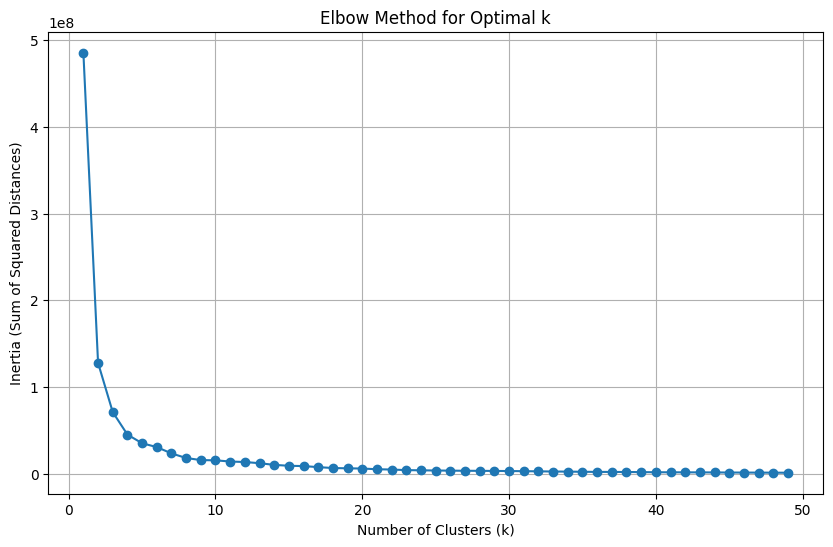

In [33]:
# Clustering based on geographical coordinates for challenge_set_updated

# Extract coordinates for adep and ades
adep_coords = challenge_set_updated[['Latitude_adep', 'Longitude_adep']].values
ades_coords = challenge_set_updated[['Latitude_ades', 'Longitude_ades']].values

# Combine all coordinates for clustering
combined_coords = np.vstack((adep_coords, ades_coords))

# Calculate inertia for each k value in the specified range
inertia = []
k_range = range(1, 50)  # Testing cluster sizes from 1 to 50

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_coords)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
        
# Automatically determining the optimal k using the "elbow" point
# Finding the point where the reduction in inertia slows down significantly
optimal_k = 1  # Default to 1 cluster if no elbow is detected
threshold_ratio = 0.01  # Define a threshold for identifying the elbow point

# Checking for the point where inertia reduction starts to slow down
for i in range(1, len(inertia) - 1):
    if (inertia[i - 1] - inertia[i]) > (inertia[i] - inertia[i + 1]) * threshold_ratio:
        optimal_k = i + 1
        break

In [34]:
# Apply K-means clustering on combined coordinates
kmeans_geo = KMeans(n_clusters=20, random_state=42)  
kmeans_geo.fit(combined_coords)

# Assign cluster labels back to adep and ades separately
adep_geo_labels = kmeans_geo.predict(adep_coords)
ades_geo_labels = kmeans_geo.predict(ades_coords)

# Map cluster labels to the original dataframe
challenge_set_updated['adep_geo_cluster'] = adep_geo_labels
challenge_set_updated['ades_geo_cluster'] = ades_geo_labels

In [35]:
# Clustering based on geographical coordinates for submission_set_updated

# Extract coordinates for adep and ades from submission_set_updated
adep_coords_submission = submission_set_updated[['Latitude_adep', 'Longitude_adep']].values
ades_coords_submission = submission_set_updated[['Latitude_ades', 'Longitude_ades']].values

# Assign cluster labels back to adep and ades separately for submission_set_updated
adep_geo_labels_submission = kmeans_geo.predict(adep_coords_submission)
ades_geo_labels_submission = kmeans_geo.predict(ades_coords_submission)

# Map cluster labels to the submission_set_updated dataframe
submission_set_updated['adep_geo_cluster'] = adep_geo_labels_submission
submission_set_updated['ades_geo_cluster'] = ades_geo_labels_submission

In [36]:
# Automatically identify categorical variables in the DataFrame
categorical_columns_auto = challenge_set_updated.select_dtypes(include=['object', 'category']).columns.tolist()

# Calculate the number of unique values for each automatically identified categorical column
unique_variations_auto = challenge_set_updated[categorical_columns_auto].nunique()

# Display the identified categorical variables and their number of unique variations
unique_variations_auto

adep                        460
ades                        367
aircraft_type                30
wtc                           2
airline                      29
offblock_season               4
flight_duration_category      4
adep_region                   7
ades_region                   7
flight_direction              3
Manufacturer                  7
Model_FAA                    30
Physical_Class_Engine         2
FAA_Weight                    3
dtype: int64

In [37]:
# Calculate the number of unique values for each categorical column efficiently
unique_variations = challenge_set_updated[categorical_columns].nunique()

# Display the number of variations for each categorical variable
unique_variations

aircraft_type               30
wtc                          2
airline                     29
offblock_hour               24
offblock_minute             60
offblock_day_of_week         7
offblock_month              12
offblock_week_of_year       52
offblock_season              4
arrival_hour                24
arrival_minute              60
is_offblock_weekend          2
is_offblock_rush_hour        2
flight_duration_category     4
adep_region                  7
ades_region                  7
same_country_flight          2
same_region_flight           2
flight_direction             3
is_intercontinental          2
Manufacturer                 7
Model_FAA                   30
Physical_Class_Engine        2
FAA_Weight                   3
dtype: int64

/home/mmaximo/ita/prc-challenge-ita/env/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/mmaximo/ita/prc-challenge-ita/env/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/mmaximo/ita/prc-challenge-ita/env/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


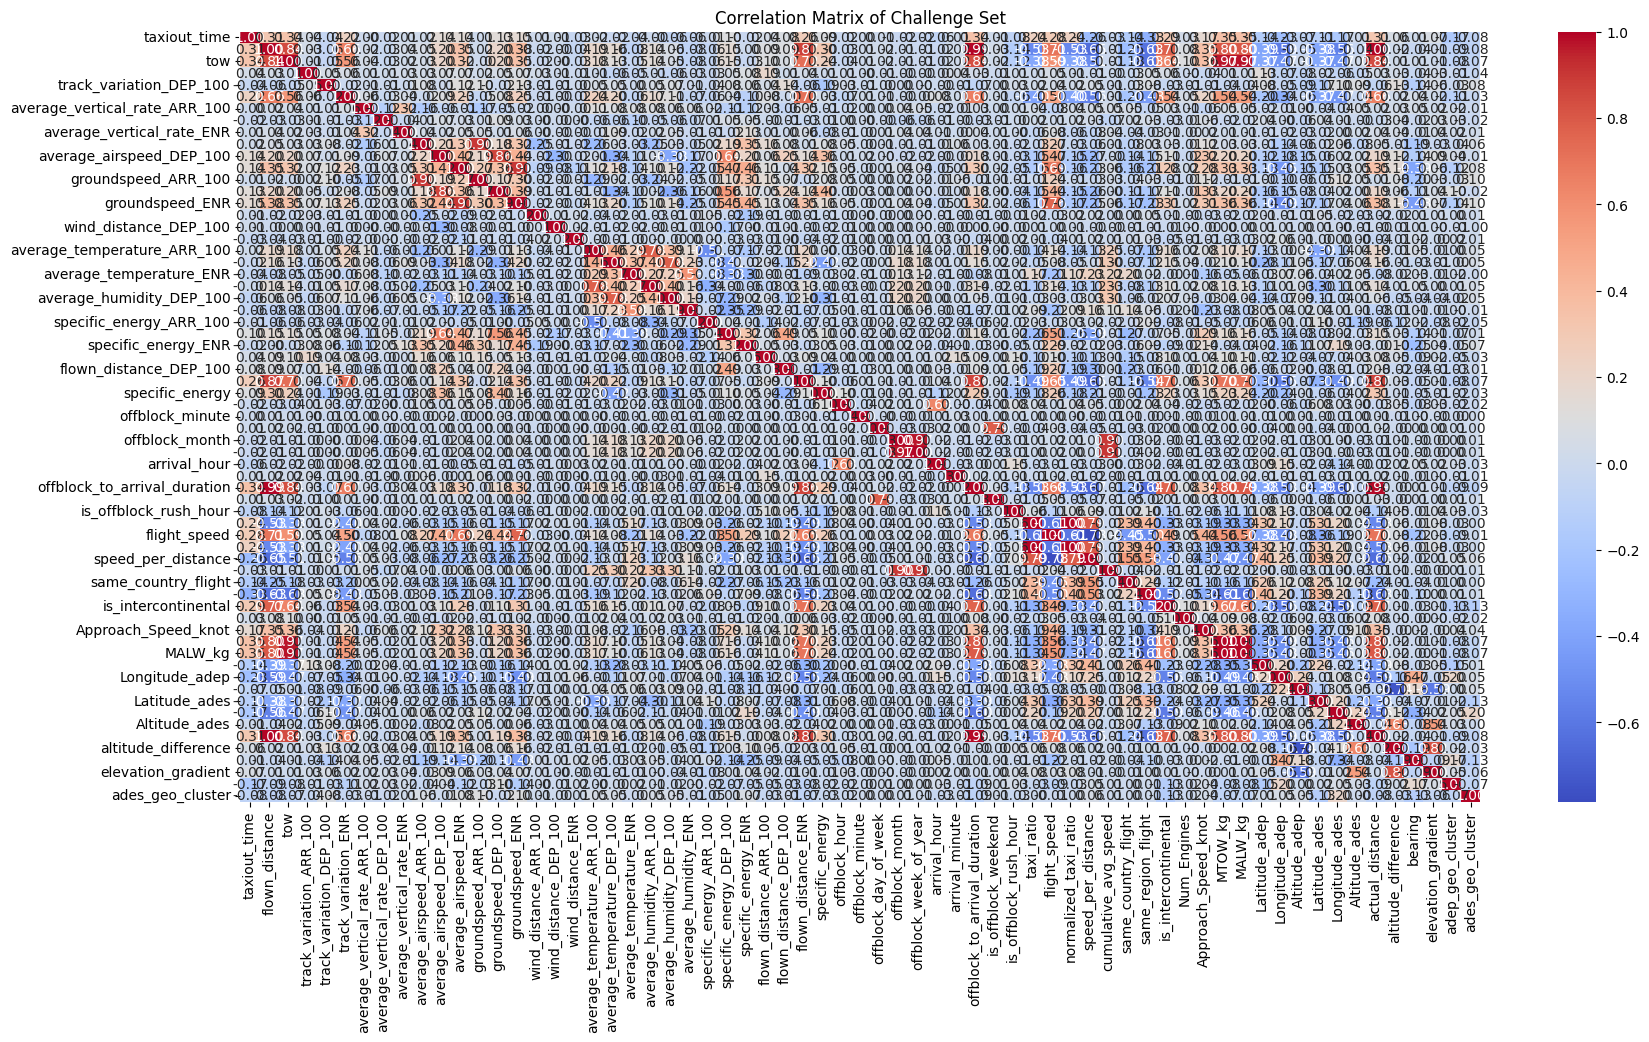

(        taxiout_time  flown_distance            tow  track_variation_ARR_100  \
 count  369013.000000   369013.000000  369013.000000             3.454850e+05   
 mean       13.507952     1021.728581   79482.257229                      inf   
 std         5.755837     1128.171163   53250.919631                      NaN   
 min         1.000000       19.000000   14944.000000             0.000000e+00   
 25%        10.000000      338.000000   55836.000000             2.419634e+01   
 50%        12.000000      647.000000   63852.000000             5.985446e+01   
 75%        16.000000     1113.000000   73756.000000             1.241850e+02   
 max        90.000000     7272.000000  351327.000000                      inf   
 
        track_variation_DEP_100  track_variation_ENR  \
 count             3.140470e+05         3.181650e+05   
 mean                       inf                  inf   
 std                        NaN                  NaN   
 min               0.000000e+00         0.000

In [38]:
# Summary statistics of the challenge set
challenge_summary = challenge_set_updated.describe()

# Check for missing values
missing_values = challenge_set_updated.isnull().sum()

# Correlation matrix to check relationships between numerical features
correlation_matrix = challenge_set_updated.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Challenge Set')
plt.show()

# Display the summary statistics and missing values
challenge_summary, missing_values

In [39]:
# Function to rearrange the dataframe so that the target variable 'tow' is the last column
def rearrange_columns(df):
    # Moving 'tow' to the last position
    columns = [col for col in df.columns if col != 'tow'] + ['tow']
    df = df[columns]
    return df

# Remove some categorical columns
# mmaximo: I am not removing 'adep' and 'ades' anymore so I can use them to imput missing values
new_columns_to_remove = ['actual_distance']
# new_columns_to_remove = ['adep', 'ades', 'actual_distance']
challenge_set_updated = remove_columns(challenge_set_updated, new_columns_to_remove)
submission_set_updated = remove_columns(submission_set_updated, new_columns_to_remove)

# Apply One-Hot Encoding to the training set
# challenge_set_updated = pd.get_dummies(challenge_set_updated, columns=categorical_columns, drop_first=True)

# Apply One-Hot Encoding to the test set
# submission_set_updated = pd.get_dummies(submission_set_updated, columns=categorical_columns, drop_first=True)

# Align the test set columns with the training set columns
# Identify missing columns and create a DataFrame with those columns set to zero
missing_cols = set(challenge_set_updated.columns) - set(submission_set_updated.columns)
missing_cols_df = pd.DataFrame(0, index=submission_set_updated.index, columns=list(missing_cols))

# Concatenate the missing columns DataFrame with the test set
submission_set_updated = pd.concat([submission_set_updated, missing_cols_df], axis=1)

# Drop extra columns in the test set that are not in the training set
extra_cols = set(submission_set_updated.columns) - set(challenge_set_updated.columns)
submission_set_updated.drop(columns=list(extra_cols), inplace=True)

# Reorder the columns of the test set to match the training set
submission_set_updated = submission_set_updated[challenge_set_updated.columns]

# Rearrange columns
challenge_set_updated = rearrange_columns(challenge_set_updated)
submission_set_updated = rearrange_columns(submission_set_updated)


In [40]:
missing_cols

set()

In [41]:
extra_cols

set()

In [42]:
challenge_set_updated.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,A320,A21N,A321,A320,E195,B788,A21N,A320,A21N,B772
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,M,M,M,H,M,M,M,H
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,bdeeef3a675587d530de70a25d7118d2,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bearing,277.346455,285.530704,305.643136,296.005451,116.445141,203.829766,131.803893,302.700411,24.367089,108.236772,...,332.262955,120.930202,293.444038,118.608849,131.991329,282.661191,322.204001,290.097453,311.966635,294.723106
elevation_gradient,0.232363,-0.000133,0.024214,-0.065017,-0.10915,-0.063803,0.039794,-0.280821,0.025994,1.653929,...,0.045247,0.516271,-0.054095,-0.30689,0.184743,-0.015872,-0.164245,0.03169,-0.058604,-0.105166
adep_geo_cluster,13,19,8,2,0,9,0,11,4,11,...,2,13,11,2,9,6,11,6,6,7
ades_geo_cluster,0,12,15,1,13,19,13,16,11,11,...,6,2,2,3,16,12,9,0,0,1


In [43]:
submission_set_updated.T

,0,1,2,3,4,5,6,7,8,9,...,105949,105950,105951,105952,105953,105954,105955,105956,105957,105958
adep,LTFJ,EBBR,KMIA,EGCN,EIDW,LTFJ,EGLL,LSZH,EGLL,LEMD,...,BKPR,LTFJ,KORD,KJFK,KSFO,LTFJ,LOWW,LTFM,EHAM,UBBB
ades,LFLL,KJFK,EGLL,LEAL,LFLL,LTAC,EIDW,EDDH,EICK,EIDW,...,LSGG,LFLL,EGLL,LEBL,EIDW,EKCH,KIAD,LSZH,EDDF,LTFM
aircraft_type,B738,A333,B77W,B38M,A320,B738,A320,A320,A320,A320,...,BCS3,B738,B789,B772,A333,B38M,B763,A321,A320,B738
wtc,M,H,H,M,M,M,M,M,M,M,...,M,M,H,H,H,M,H,M,M,M
airline,6351ec1b849adacc0cbb3b1313d8d39b,bdeeef3a675587d530de70a25d7118d2,5543e4dc327359ffaf5b9c0e6faaf0e1,3922524069809ac4326134429751e26f,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,2d5def0a5a844b343ba1b7cc9cb28fa9,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,...,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,5543e4dc327359ffaf5b9c0e6faaf0e1,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,5d407cb11cc29578cc3e292e743f5393,6351ec1b849adacc0cbb3b1313d8d39b,f502877cab405652cf0dd70c2213e730,6351ec1b849adacc0cbb3b1313d8d39b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bearing,293.477205,291.395141,43.036806,178.644825,131.790949,104.173834,301.052709,7.8847,277.346455,352.849559,...,294.105445,293.477205,47.859294,62.377552,33.907846,329.024194,300.682568,300.085737,132.448927,279.85055
elevation_gradient,-0.030154,-0.009004,0.003095,-0.006508,0.149765,1.983765,0.10915,-0.598866,0.232363,-0.368588,...,-1.085058,-0.030154,-0.028218,0.0,0.008554,-0.150159,-0.012142,0.061473,0.311654,0.179499
adep_geo_cluster,11,6,12,13,0,11,13,2,13,7,...,3,11,15,1,4,11,16,11,6,10
ades_geo_cluster,17,1,13,19,17,11,0,9,0,0,...,17,17,13,19,0,9,1,2,2,11


In [44]:
total_dataset = pd.concat([challenge_set_updated, submission_set_updated])
total_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,105949,105950,105951,105952,105953,105954,105955,105956,105957,105958
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,BKPR,LTFJ,KORD,KJFK,KSFO,LTFJ,LOWW,LTFM,EHAM,UBBB
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,LSGG,LFLL,EGLL,LEBL,EIDW,EKCH,KIAD,LSZH,EDDF,LTFM
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,BCS3,B738,B789,B772,A333,B38M,B763,A321,A320,B738
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,H,H,H,M,H,M,M,M
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,5543e4dc327359ffaf5b9c0e6faaf0e1,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,5d407cb11cc29578cc3e292e743f5393,6351ec1b849adacc0cbb3b1313d8d39b,f502877cab405652cf0dd70c2213e730,6351ec1b849adacc0cbb3b1313d8d39b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bearing,277.346455,285.530704,305.643136,296.005451,116.445141,203.829766,131.803893,302.700411,24.367089,108.236772,...,294.105445,293.477205,47.859294,62.377552,33.907846,329.024194,300.682568,300.085737,132.448927,279.85055
elevation_gradient,0.232363,-0.000133,0.024214,-0.065017,-0.10915,-0.063803,0.039794,-0.280821,0.025994,1.653929,...,-1.085058,-0.030154,-0.028218,0.0,0.008554,-0.150159,-0.012142,0.061473,0.311654,0.179499
adep_geo_cluster,13,19,8,2,0,9,0,11,4,11,...,3,11,15,1,4,11,16,11,6,10
ades_geo_cluster,0,12,15,1,13,19,13,16,11,11,...,17,17,13,19,0,9,1,2,2,11


In [45]:
total_dataset.replace(np.inf, np.nan, inplace=True)

In [46]:
pd.set_option('display.max_rows', None)

print('Showing proportion of NaNs in the total dataset (challenge + submission):')
print(total_dataset.isna().sum()/total_dataset.shape[0])

pd.reset_option('display.max_rows')

Showing proportion of NaNs in the total dataset (challenge + submission):
adep                             0.000000
ades                             0.000000
aircraft_type                    0.000000
wtc                              0.000000
airline                          0.000000
taxiout_time                     0.000000
flown_distance                   0.000000
track_variation_ARR_100          0.064160
track_variation_DEP_100          0.150224
track_variation_ENR              0.137267
average_vertical_rate_ARR_100    0.064166
average_vertical_rate_DEP_100    0.150230
average_vertical_rate_ENR        0.137271
average_airspeed_ARR_100         0.064859
average_airspeed_DEP_100         0.150409
average_airspeed_ENR             0.137275
groundspeed_ARR_100              0.064160
groundspeed_DEP_100              0.150224
groundspeed_ENR                  0.137267
wind_distance_ARR_100            0.063616
wind_distance_DEP_100            0.149042
wind_distance_ENR                0.137263
av

In [47]:
num_nans = total_dataset.isna().sum().sum()
columns = total_dataset.columns[total_dataset.isna().sum() > 0]
columns = list(columns)
columns.remove('tow')

cropped_dataset = total_dataset[['adep', 'ades', 'aircraft_type'] + columns]
cropped_dataset.head()

mean_values = cropped_dataset[columns].mean()

print(mean_values)

track_variation_ARR_100          7.437340e+01
track_variation_DEP_100          7.093348e+01
track_variation_ENR              2.920475e+01
average_vertical_rate_ARR_100   -1.147050e+03
average_vertical_rate_DEP_100    1.712534e+03
average_vertical_rate_ENR       -7.816254e+01
average_airspeed_ARR_100         1.470796e+02
average_airspeed_DEP_100         1.802952e+02
average_airspeed_ENR             2.284382e+02
groundspeed_ARR_100              1.424208e+02
groundspeed_DEP_100              1.771598e+02
groundspeed_ENR                  2.286949e+02
wind_distance_ARR_100            3.591999e+02
wind_distance_DEP_100            1.072722e+02
wind_distance_ENR               -1.453936e+03
average_temperature_ARR_100      2.637085e+02
average_temperature_DEP_100      2.526542e+02
average_temperature_ENR          2.210615e+02
average_humidity_ARR_100         2.798654e-03
average_humidity_DEP_100         1.652539e-03
average_humidity_ENR             5.616125e-05
specific_energy_ARR_100          3

In [48]:
grouped_dataset = cropped_dataset.groupby(['adep', 'ades', 'aircraft_type']).median()
grouped_dataset.head()

# print(grouped_dataset.shape[0])
# total_dataset_imputted = total_dataset
# total_dataset_imputted[columns] = grouped_dataset[columns]

track_variation_ARR_100  track_variation_DEP_100  \
adep ades aircraft_type                                                     
BIKF EGCC B38M                        106.962873                 0.381966   
          B738                         81.044395               115.288750   
     EGGD B38M                          2.626313                74.514518   
     EGKK B38M                         28.095888                41.296190   
          B738                         27.328421                45.469595   

                         track_variation_ENR  average_vertical_rate_ARR_100  \
adep ades aircraft_type                                                       
BIKF EGCC B38M                     20.828562                   -1228.444444   
          B738                     36.450225                   -1197.714286   
     EGGD B38M                     37.243574                   -1011.200000   
     EGKK B38M                     45.072241                    -952.869912   
          B738                     35.535351                    -909.765388   

                         average_vertical_rate_DEP_100  \
adep ades aircraft_type                                  
BIKF EGCC B38M                             1155.678161   
          B738                             1252.128280   
     EGGD B38M                             1616.413604   
     EGKK B38M                             1547.992841   
          B738                             1298.923858   

                         average_vertical_rate_ENR  average_airspeed_ARR_100  \
adep ades aircraft_type                                                        
BIKF EGCC B38M                          -39.561785                151.851590   
          B738                           98.024788                154.229611   
     EGGD B38M                            5.143417                157.472807   
     EGKK B38M                         -246.786773                166.848617   
          B738                         -108.118835                133.103852   

                         average_airspeed_DEP_100  average_airspeed_ENR  \
adep ades aircraft_type                                                   
BIKF EGCC B38M                         136.586061            219.046035   
          B738                         129.063777            246.121472   
     EGGD B38M                         167.187358            231.297811   
     EGKK B38M                         166.738882            243.445959   
          B738                         127.591985            232.133491   

                         groundspeed_ARR_100  ...  average_humidity_ARR_100  \
adep ades aircraft_type                       ...                             
BIKF EGCC B38M                    142.549574  ...                  0.000926   
          B738                    140.307362  ...                  0.001647   
     EGGD B38M                    154.977943  ...                  0.002021   
     EGKK B38M                    142.936505  ...                  0.001824   
          B738                    135.057922  ...                  0.001848   

                         average_humidity_DEP_100  average_humidity_ENR  \
adep ades aircraft_type                                                   
BIKF EGCC B38M                           0.000828              0.000009   
          B738                           0.001287              0.000009   
     EGGD B38M                           0.000713              0.000007   
     EGKK B38M                           0.000985              0.000021   
          B738                           0.001147              0.000012   

                         specific_energy_ARR_100  specific_energy_DEP_100  \
adep ades aircraft_type                                                     
BIKF EGCC B38M                               NaN            158297.643120   
          B738                      36980.614374            178136.973595   
     EGGD B38M                       4767.057271 

In [49]:
print('Number of NaNs:', total_dataset.isna().sum().sum())

Number of NaNs: 1782980


In [50]:
mask = (total_dataset['adep'] == 'BIKF') & (total_dataset['ades'] == 'EGCC') & (total_dataset['aircraft_type'] == 'B38M')
total_dataset.loc[mask]

,adep,ades,aircraft_type,wtc,airline,taxiout_time,flown_distance,track_variation_ARR_100,track_variation_DEP_100,track_variation_ENR,...,Altitude_adep,Latitude_ades,Longitude_ades,Altitude_ades,altitude_difference,bearing,elevation_gradient,adep_geo_cluster,ades_geo_cluster,tow
15090,BIKF,EGCC,B38M,M,3922524069809ac4326134429751e26f,10.0,931,106.962873,NaN,6.217697,...,53,53.354,-2.275,79,26,126.071797,0.015728,0,13,59835.0
105673,BIKF,EGCC,B38M,M,3922524069809ac4326134429751e26f,10.0,933,NaN,0.381966,35.439428,...,53,53.354,-2.275,79,26,126.071797,0.015728,0,13,NaN


In [51]:
from tqdm import tqdm

num_elems = grouped_dataset.shape[0] * grouped_dataset.shape[1]
count = 0

# Uncomment to use the (adep, ades, aircraft_type) strategy!
# for group, row in tqdm(grouped_dataset.iterrows(), total=grouped_dataset.shape[0]):
#     adep = group[0]
#     ades = group[1]
#     aircraft_type = group[2]
#     mask = (total_dataset['adep'] == adep) & (total_dataset['ades'] == ades) & (total_dataset['aircraft_type'] == aircraft_type)
#     for col, value in row.items():
#         if not pd.isna(value):
#             total_dataset.loc[mask, col] = total_dataset.loc[mask, col].fillna(value)

In [52]:
mask = (total_dataset['adep'] == 'BIKF') & (total_dataset['ades'] == 'EGCC') & (total_dataset['aircraft_type'] == 'B38M')
total_dataset.loc[mask]

,adep,ades,aircraft_type,wtc,airline,taxiout_time,flown_distance,track_variation_ARR_100,track_variation_DEP_100,track_variation_ENR,...,Altitude_adep,Latitude_ades,Longitude_ades,Altitude_ades,altitude_difference,bearing,elevation_gradient,adep_geo_cluster,ades_geo_cluster,tow
15090,BIKF,EGCC,B38M,M,3922524069809ac4326134429751e26f,10.0,931,106.962873,NaN,6.217697,...,53,53.354,-2.275,79,26,126.071797,0.015728,0,13,59835.0
105673,BIKF,EGCC,B38M,M,3922524069809ac4326134429751e26f,10.0,933,NaN,0.381966,35.439428,...,53,53.354,-2.275,79,26,126.071797,0.015728,0,13,NaN


In [53]:
print('Number of NaNs:', total_dataset.isna().sum().sum())

Number of NaNs: 1782980


In [54]:
pd.set_option('display.max_rows', None)

print('Showing proportion of NaNs in the total dataset (challenge + submission):')
print(total_dataset.isna().sum()/total_dataset.shape[0])

pd.reset_option('display.max_rows')

columns_with_nan = total_dataset.columns[total_dataset.isna().sum() > 0]
columns_with_nan = list(columns_with_nan)
columns_with_nan.remove('tow')
print(columns_with_nan)

Showing proportion of NaNs in the total dataset (challenge + submission):
adep                             0.000000
ades                             0.000000
aircraft_type                    0.000000
wtc                              0.000000
airline                          0.000000
taxiout_time                     0.000000
flown_distance                   0.000000
track_variation_ARR_100          0.064160
track_variation_DEP_100          0.150224
track_variation_ENR              0.137267
average_vertical_rate_ARR_100    0.064166
average_vertical_rate_DEP_100    0.150230
average_vertical_rate_ENR        0.137271
average_airspeed_ARR_100         0.064859
average_airspeed_DEP_100         0.150409
average_airspeed_ENR             0.137275
groundspeed_ARR_100              0.064160
groundspeed_DEP_100              0.150224
groundspeed_ENR                  0.137267
wind_distance_ARR_100            0.063616
wind_distance_DEP_100            0.149042
wind_distance_ENR                0.137263
av

In [55]:
for col in columns_with_nan:
    total_dataset[col] = total_dataset[col].fillna(mean_values[col])

print('Number of NaNs (with tow):', total_dataset.isna().sum().sum())
print('Number of NaNs (in tow):', total_dataset['tow'].isna().sum())

challenge_set_updated = total_dataset[~total_dataset['tow'].isna()]
submission_set_updated = total_dataset[total_dataset['tow'].isna()]

print('Number of flights in challenge:', challenge_set_updated.shape[0])
print('Number of flights in submission:', submission_set_updated.shape[0])

Number of NaNs (with tow): 105959
Number of NaNs (in tow): 105959
Number of flights in challenge: 369013
Number of flights in submission: 105959


In [56]:
challenge_set_updated.to_csv('./data/challenge_set_updated_v9_median.csv', index=False)
submission_set_updated.to_csv('./data/submission_set_updated_v9_median.csv', index=False)